<a href="https://colab.research.google.com/github/HSYhrae/mulcamp_FinalPJ/blob/main/final_pj_ML(Churn).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### 구글 드라이브 연동

In [97]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


### 데이터 및 라이브러리 불러오기

In [98]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
df = pd.read_excel('/content/drive/MyDrive/Mulcamp_final/data/Telco_customer_churn(preprocessed).xlsx')
df.head()

,gender,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,...,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,ChurnCategory_0,ChurnCategory_Attitude,ChurnCategory_Competitor,ChurnCategory_Dissatisfaction,ChurnCategory_Other,ChurnCategory_Price,Service_Num
0,1,0,1,0,0,1,0,0,1,0,...,0,1,0,0,0,1,0,0,0,4
1,0,0,8,1,1,1,0,1,0,0,...,1,0,0,0,0,1,0,0,0,6
2,1,0,18,1,1,1,0,0,0,0,...,0,1,0,0,0,1,0,0,0,8
3,0,0,25,1,0,1,0,1,1,0,...,0,1,0,0,0,0,1,0,0,8
4,0,0,37,1,1,1,0,0,0,0,...,0,1,0,0,0,0,0,0,1,5


In [99]:
df.Churn.value_counts()

0    666
1    466
Name: Churn, dtype: int64

- 데이터 확인

In [100]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1132 entries, 0 to 1131
Data columns (total 45 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   gender                                   1132 non-null   int64  
 1   Dependents                               1132 non-null   int64  
 2   tenure                                   1132 non-null   int64  
 3   PhoneService                             1132 non-null   int64  
 4   MultipleLines                            1132 non-null   int64  
 5   InternetService                          1132 non-null   int64  
 6   OnlineSecurity                           1132 non-null   int64  
 7   OnlineBackup                             1132 non-null   int64  
 8   DeviceProtection                         1132 non-null   int64  
 9   TechSupport                              1132 non-null   int64  
 10  StreamingTV                              1132 no

### 머신러닝 준비

In [101]:
X = df.drop(['Churn', 'ChurnReason', 'ChurnCategory_0', 'ChurnCategory_Attitude', 'ChurnCategory_Competitor', 'ChurnCategory_Dissatisfaction', 'ChurnCategory_Other', 'ChurnCategory_Price'], axis = 1)
y = df['Churn']

### 카이제곱 검정(범주형 변수 상관분석)

In [102]:
import pandas as pd
from scipy.stats import chi2_contingency

# 데이터프레임에서 'SeniorCitizen', 'MusicStreaming', 'MovieStreaming', 'Churn' 컬럼 선택
selected_columns = ['gender', 'Dependents', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection'
            , 'TechSupport', 'StreamingTV', 'StreamingMovies', 'PaperlessBilling', 'Married', 'ReferredAFriend', 'StreamingMusic', 'PremiumTechSupport'
            , 'UnlimitedData', 'Contract_1', 'Contract_12', 'Contract_24', 'PaymentMethod_Bank transfer (automatic)', 'PaymentMethod_Credit card (automatic)'
            , 'PaymentMethod_Electronic check', 'PaymentMethod_Mailed check', 'Churn']
# 결과를 저장할 데이터프레임 생성
chi2_results = pd.DataFrame(columns=['Variable', 'Chi-squared', 'p-value'])

# 각 변수별로 카이 제곱 검정 수행
for var in selected_columns:
    # 교차 표 생성
    cross_tab = pd.crosstab(df[var], df['Churn'])

    # 카이 제곱 검정 수행
    chi2, p, _, _ = chi2_contingency(cross_tab)

    # 결과 데이터프레임에 추가
    chi2_results = chi2_results.append({'Variable': var, 'Chi-squared': chi2, 'p-value': p}, ignore_index=True)

# 결과 데이터프레임 출력
chi2_results.sort_values('p-value')

,Variable,Chi-squared,p-value
24,Churn,1127.874881,2.887400e-247
17,Contract_1,188.480063,6.825074e-43
19,Contract_24,92.398992,7.085018e-22
22,PaymentMethod_Electronic check,68.448961,1.302043e-16
8,TechSupport,66.656732,3.231508e-16
15,PremiumTechSupport,66.656732,3.231508e-16
18,Contract_12,65.556394,5.647460e-16
5,OnlineSecurity,55.904839,7.606511e-14
20,PaymentMethod_Bank transfer (automatic),41.399263,1.241042e-10
6,OnlineBackup,37.810201,7.797298e-10


- 수치형 변수 추출

In [103]:
# 수치형 변수
numeric_features = ['tenure', 'Age', 'NumberOfReferrals', 'MonthlyCharges', 'TotalCharges', 'AvgMonthlyLongDistanceCharges', 'AvgMonthlyGBDownload'
                    , 'TotalRefunds', 'TotalExtraDataCharges', 'TotalLongDistanceCharges', 'TotalRevenue','SatisfactionScore']

In [104]:
# 이상치 탐색 변수
out_cols = ['tenure', 'NumberOfReferrals', 'MonthlyCharges', 'TotalCharges', 'AvgMonthlyLongDistanceCharges', 'AvgMonthlyGBDownload'
                    , 'TotalRefunds', 'TotalExtraDataCharges', 'TotalLongDistanceCharges', 'TotalRevenue','SatisfactionScore']

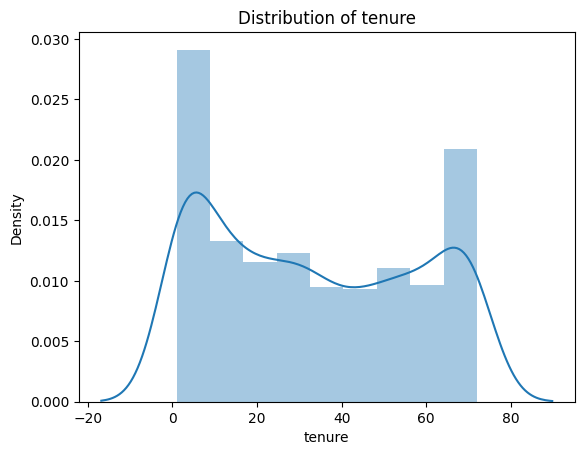

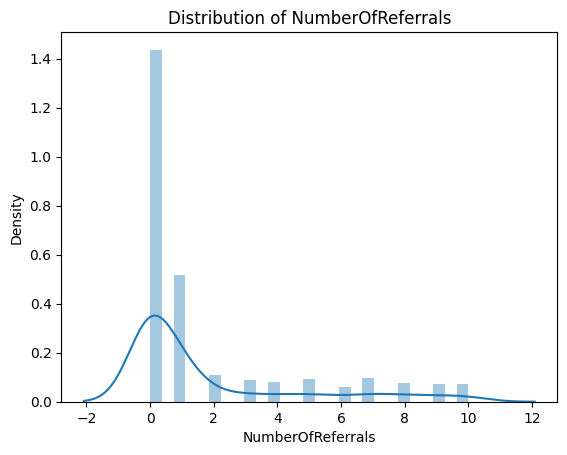

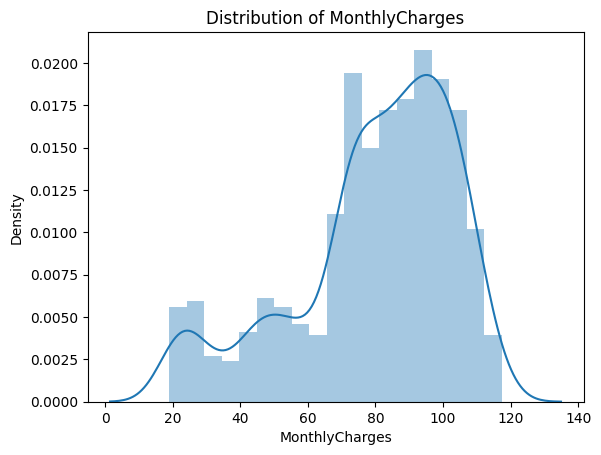

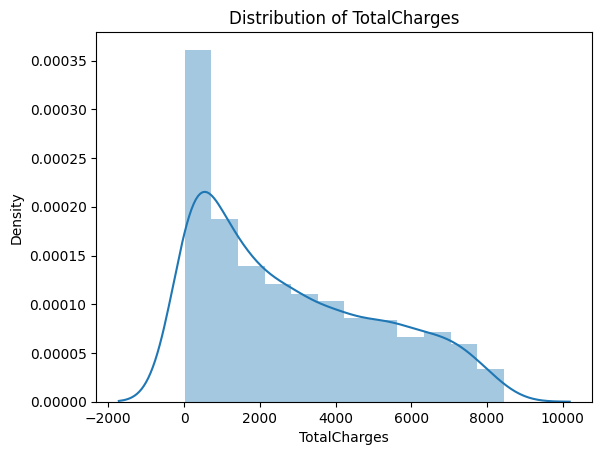

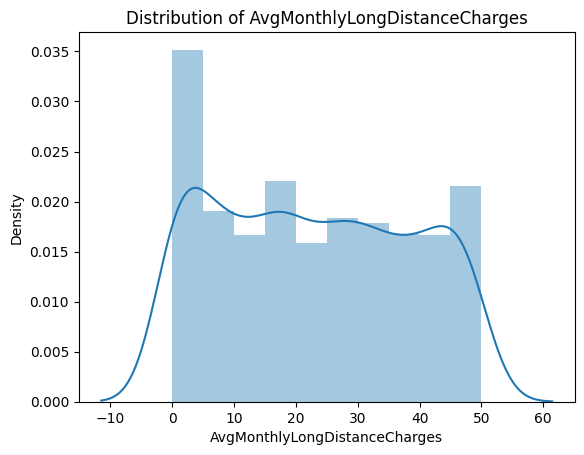

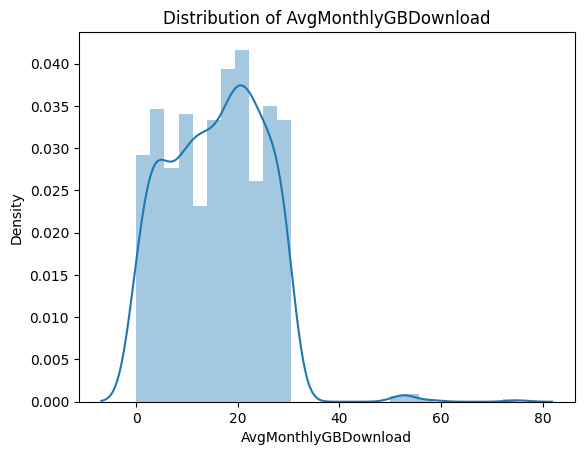

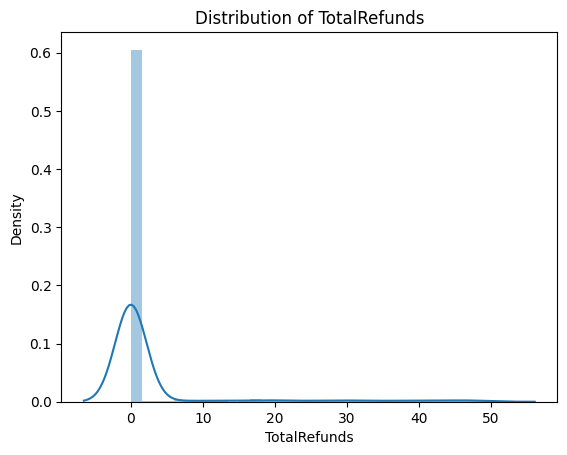

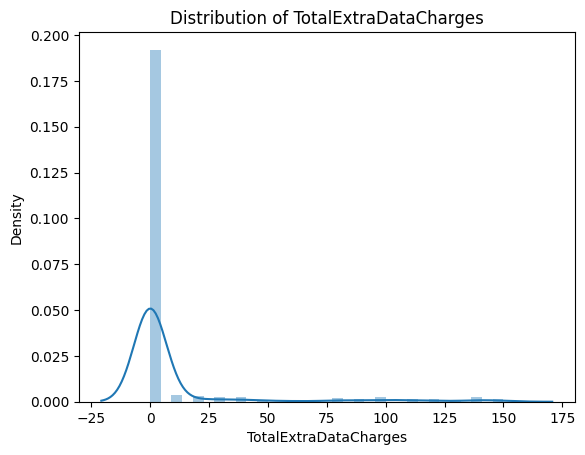

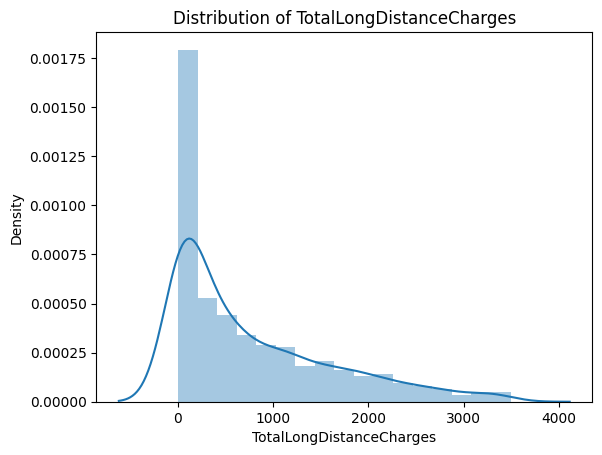

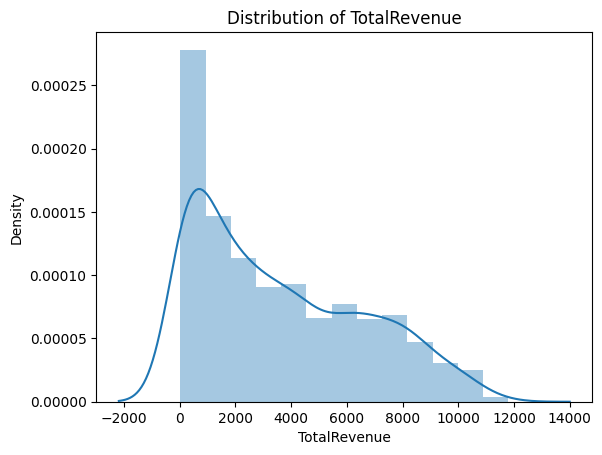

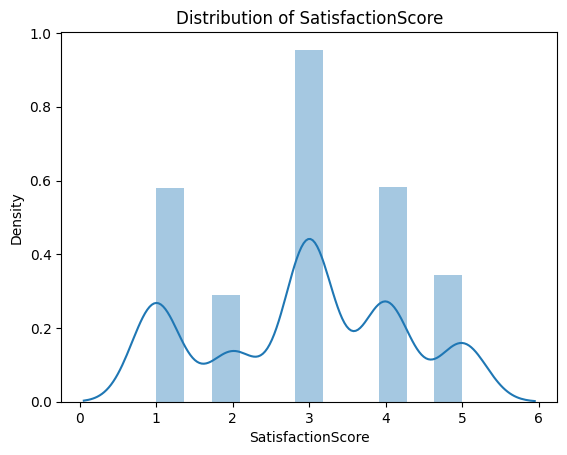

In [105]:
import seaborn as sns
import matplotlib.pyplot as plt
for col in out_cols:
    sns.distplot(df[col])
    plt.title(f'Distribution of {col}')  # 각 그래프의 제목을 설정합니다.
    plt.show()  # 각 열에 대한 분포 그래프를 표시합니다.

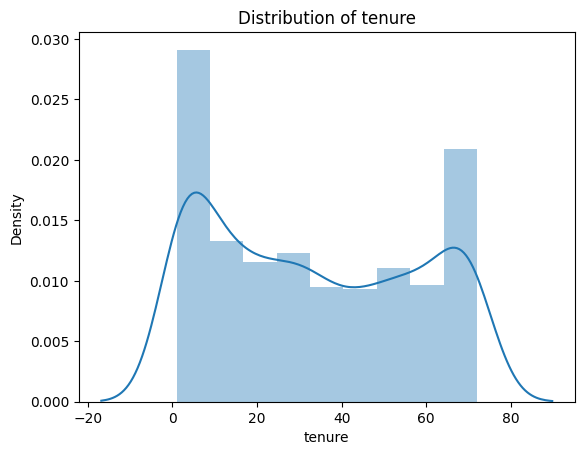

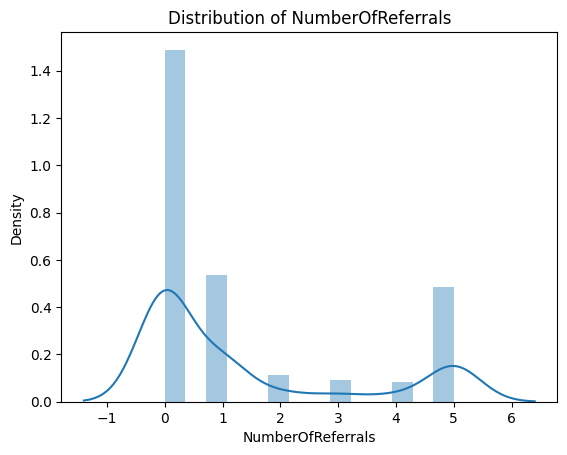

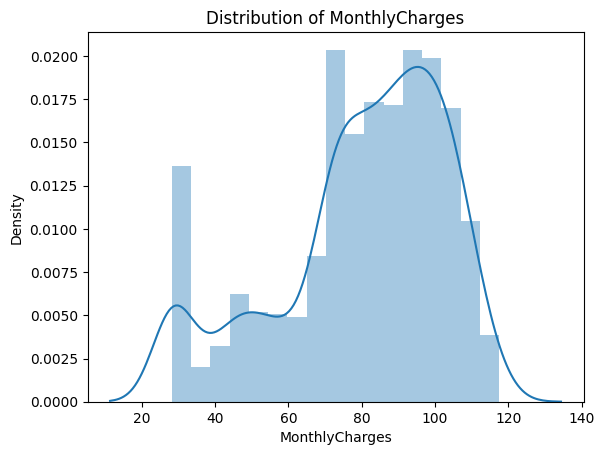

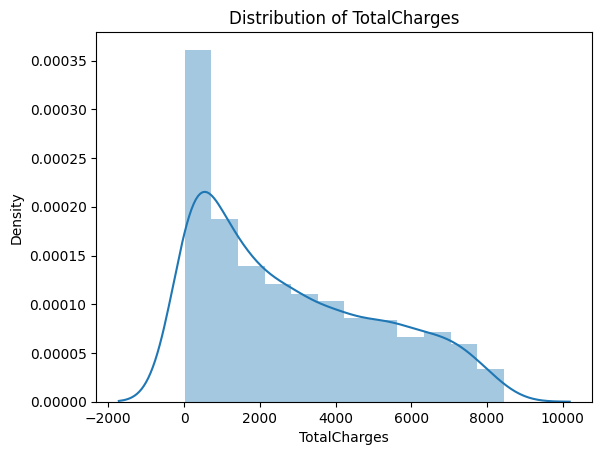

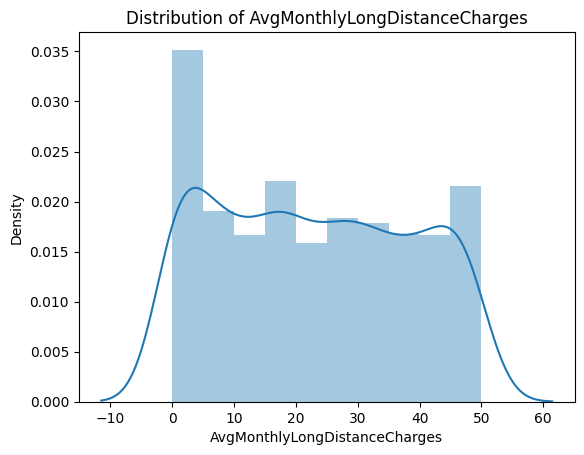

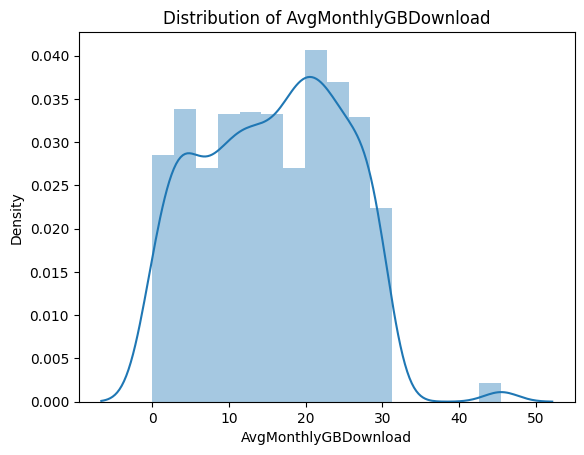

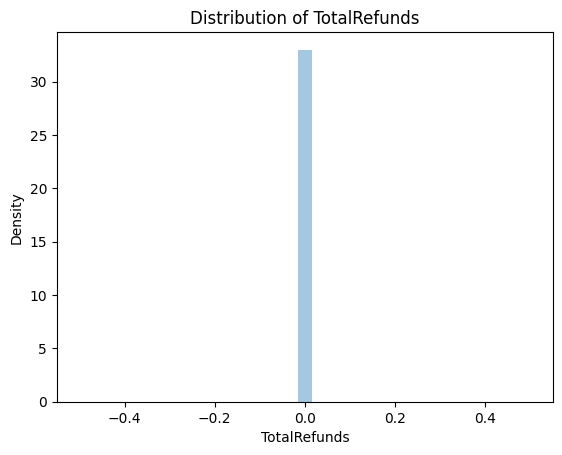

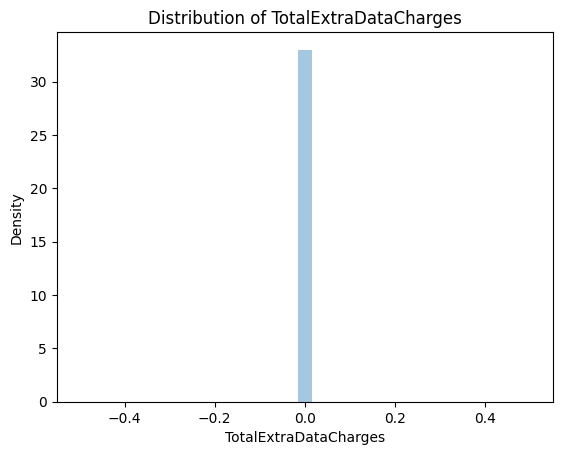

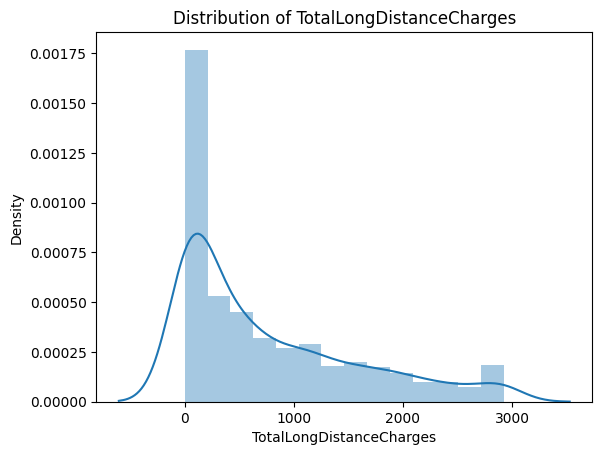

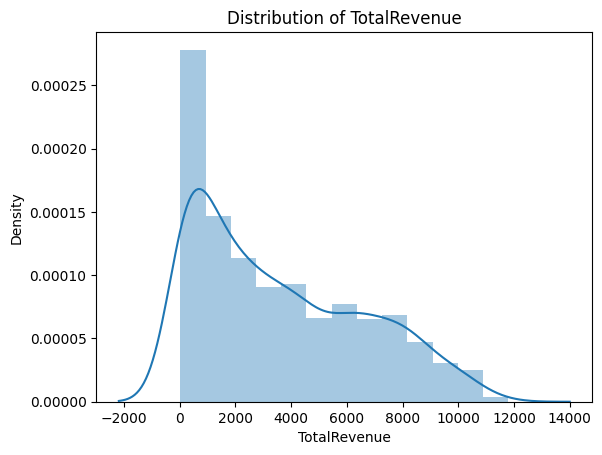

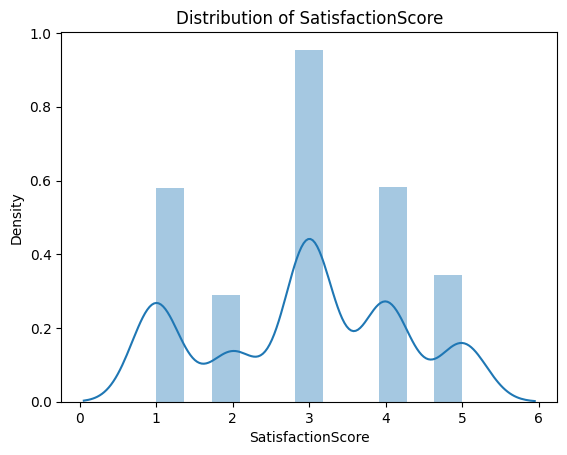

In [106]:
import numpy as np
import pandas as pd

for col in out_cols:
    # IQR 계산
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1

    # 상한값 및 하한값 설정 (k = 1.5)
    k = 1.5
    upper_bound = Q3 + k * IQR
    lower_bound = Q1 - k * IQR

    # 이상치 식별
    outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)]

    for i in range(len(df[col])):
        if df[col].loc[i] > upper_bound:
            df[col].loc[outliers.index] = upper_bound
        elif df[col].loc[i] < lower_bound:
            df[col].loc[outliers.index] = lower_bound



    sns.distplot(df[col])  # 히스토그램과 KDE를 함께 그립니다.
    plt.title(f'Distribution of {col}')  # 각 그래프의 제목을 설정합니다.
    plt.show()  # 각 열에 대한 분포 그래프를 표시합니다.

### 데이터 분할

In [107]:
# X = X.drop(['PremiumTechSupport', 'Contract_24', 'TotalExtraDataCharges', 'PaymentMethod_Mailed check', 'ReferredAFriend', 'UnlimitedData', 'Married'
#             , 'InternetService', 'PhoneService', 'Dependents', 'PaymentMethod_Electronic check', 'Contract_12', 'Contract_1'], axis = 1)

In [108]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 100)

In [109]:
X_train.shape, y_train.shape

((905, 37), (905,))

### 스케일링 3가지

In [110]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler

# Creating functions for scaling
def Standard_Scaler (df, col_names):
    features = df[col_names]
    scaler = StandardScaler().fit(features.values)
    features = scaler.transform(features.values)
    df[col_names] = features
    return df

def MinMax_Scaler (df, col_names):
    features = df[col_names]
    scaler = MinMaxScaler().fit(features.values)
    features = scaler.transform(features.values)
    df[col_names] = features
    return df

def Robust_Scaler (df, col_names):
    features = df[col_names]
    scaler = RobustScaler().fit(features.values)
    features = scaler.transform(features.values)
    df[col_names] = features
    return df

In [111]:
col_names = numeric_features
df_ss = X_train.copy()
X_train_ss = Standard_Scaler(df_ss, col_names)

df_mm = X_train.copy()
X_train_mm = MinMax_Scaler(df_mm, col_names)

df_rs = X_train.copy()
X_train_rs = Robust_Scaler(df_rs, col_names)

### 오버 샘플링

#### SMOTE

In [112]:
# 데이터 불균형으로 oversampling
from imblearn.over_sampling import SMOTE
smote = SMOTE(random_state=0)
X_train_ssover, y_train_over = smote.fit_resample(X_train_ss, y_train)

X_train_ssover.shape, y_train_over.shape

((1078, 37), (1078,))

In [113]:
# 데이터 불균형으로 oversampling
from imblearn.over_sampling import SMOTE
smote = SMOTE(random_state=0)
X_train_mmover, y_train_over = smote.fit_resample(X_train_mm, y_train)

X_train_mmover.shape, y_train_over.shape

((1078, 37), (1078,))

In [114]:
# 데이터 불균형으로 oversampling
from imblearn.over_sampling import SMOTE
smote = SMOTE(random_state=0)
X_train_rsover, y_train_over = smote.fit_resample(X_train_rs, y_train)

X_train_rsover.shape, y_train_over.shape

((1078, 37), (1078,))

#### Borderline SMOTE

In [115]:
# 데이터 불균형으로 oversampling
from imblearn.over_sampling import BorderlineSMOTE
bdsmt = BorderlineSMOTE(random_state=0)
X_border_ss, y_border = bdsmt.fit_resample(X_train_ss, y_train)

X_border_ss.shape, y_border.shape

((1078, 37), (1078,))

In [116]:
# 데이터 불균형으로 oversampling
from imblearn.over_sampling import BorderlineSMOTE
bdsmt = BorderlineSMOTE(random_state=0)
X_border_mm, y_border = bdsmt.fit_resample(X_train_mm, y_train)

X_border_mm.shape, y_border.shape

((1078, 37), (1078,))

In [117]:
# 데이터 불균형으로 oversampling
from imblearn.over_sampling import BorderlineSMOTE
bdsmt = BorderlineSMOTE(random_state=0)
X_border_rs, y_border = bdsmt.fit_resample(X_train_rs, y_train)

X_border_rs.shape, y_border.shape

((1078, 37), (1078,))

### SHAP
- 모든 머신러닝 모델의 결과를 설명하기 위한 게임 이론적 접근 방식이다.
- 이는 협동 게임 이론의 샤플리 값 개념을 기반으로 하며, 각 변수에게 예측에 대한 기여도를 나타내는 값을 할당한다.
- 복잡한 모델에서 결과를 해석하기위해 중요한 도구이다.

In [118]:
 !pip install shap

In [119]:
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# XGBoost 모델 생성 및 학습
model = xgb.XGBClassifier(objective="binary:logistic")
model.fit(X_train_rsover, y_train_over)

# 모델 평가
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
round(accuracy, 4)

0.5595

In [120]:
import shap

# Create a SHAP explainer for your trained model
explainer = shap.Explainer(model)

# Calculate SHAP values for your test data
shap_values = explainer(X_test)


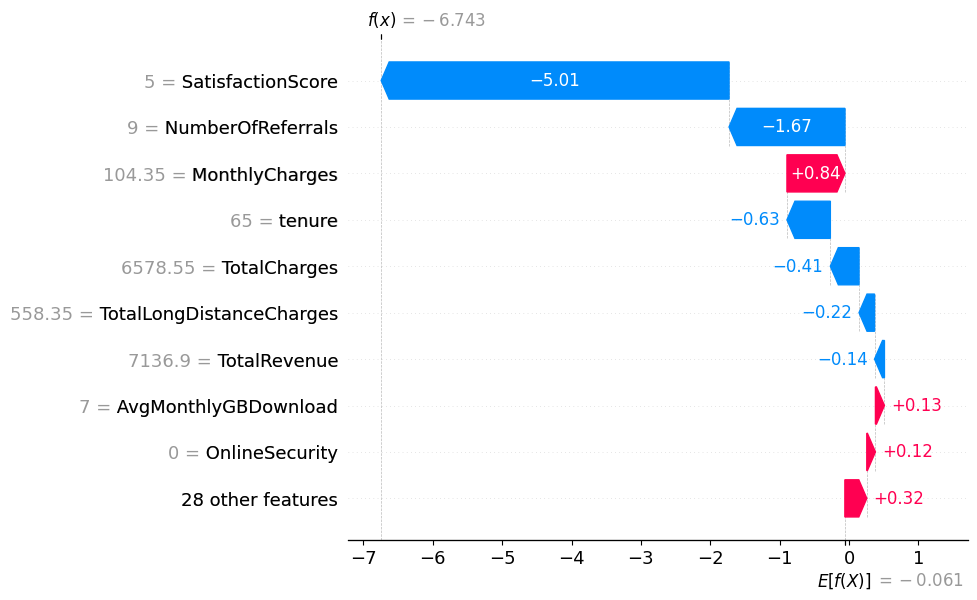

In [121]:
shap.plots.waterfall(shap_values[0])

In [122]:
import pandas as pd
import shap

# Create a SHAP explainer for your model
explainer = shap.Explainer(model, X_train_ss)

# Get SHAP values for a specific instance (e.g., the first instance in your test data)
shap_values = explainer.shap_values(X_test.iloc[0])

# Access feature names (assuming X_test is your feature dataset)
feature_names = X_test.columns

# Create a DataFrame to match feature names with SHAP values
shap_df = pd.DataFrame({'Feature': feature_names, 'SHAP Value': shap_values, 'ABS SHAP Value': abs(shap_values)})

# Display the DataFrame
shap_df.sort_values('ABS SHAP Value')


,Feature,SHAP Value,ABS SHAP Value
1,Dependents,0.000000,0.000000
3,PhoneService,0.000000,0.000000
5,InternetService,0.000000,0.000000
23,UnlimitedData,0.000000,0.000000
16,Married,0.000000,0.000000
22,PremiumTechSupport,0.000000,0.000000
35,PaymentMethod_Mailed check,0.000000,0.000000
25,TotalExtraDataCharges,0.000000,0.000000
31,Contract_24,0.000000,0.000000
30,Contract_12,0.000936,0.000936


In [123]:
import pandas as pd
import shap

# Create a SHAP explainer for your model
explainer = shap.Explainer(model, X_train_ss)

# Get SHAP values for a specific instance (e.g., the first instance in your test data)
shap_values = explainer.shap_values(X_test.iloc[0])

# Access feature names (assuming X_test is your feature dataset)
feature_names = X_test.columns

# Create a DataFrame to match feature names with SHAP values
shap_df = pd.DataFrame({'Feature': feature_names, 'SHAP Value': shap_values})

# Display the DataFrame
shap_df.sort_values('SHAP Value')


,Feature,SHAP Value
28,SatisfactionScore,-4.707159
18,NumberOfReferrals,-1.024688
2,tenure,-0.541354
14,TotalCharges,-0.448030
27,TotalRevenue,-0.319047
26,TotalLongDistanceCharges,-0.279999
15,Age,-0.150983
7,OnlineBackup,-0.092164
20,AvgMonthlyGBDownload,-0.075081
34,PaymentMethod_Electronic check,-0.014405


In [124]:
import shap

explainer = shap.Explainer(model)
shap_values = explainer(X_test)

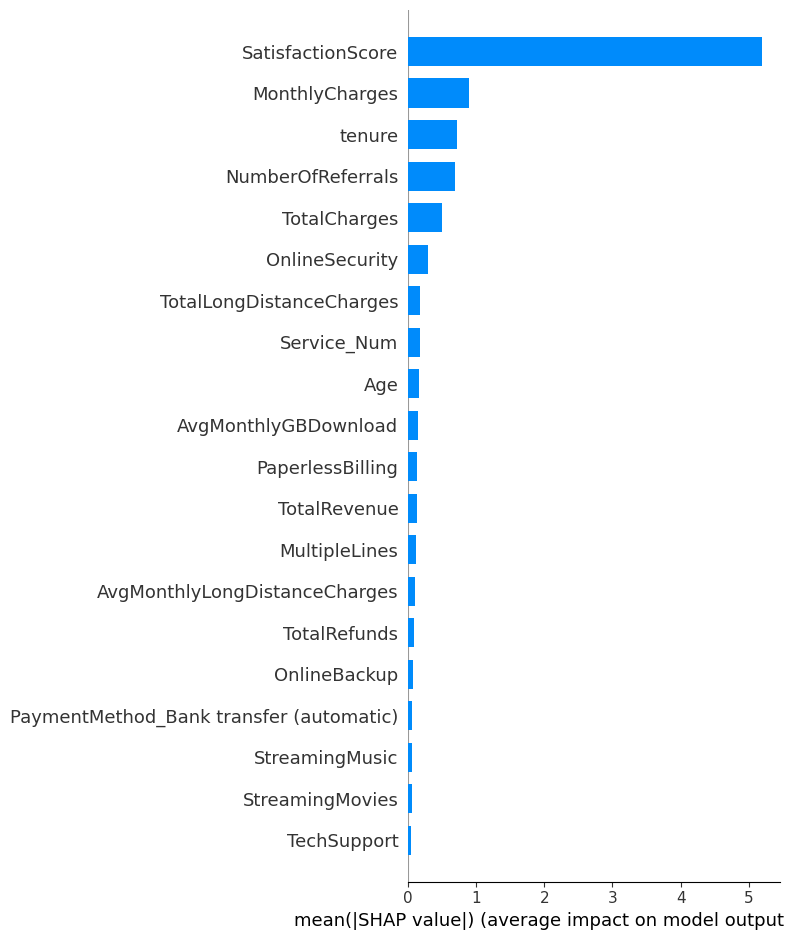

In [125]:
shap.summary_plot(shap_values, X_test, plot_type="bar")

### 머신러닝 모델 호출

In [126]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from xgboost.sklearn import XGBClassifier

# Considered ML models
models = []
models.append(('RandomForest',RandomForestClassifier()))
models.append(('SVM', SVC()))
models.append(('AdaBoost', AdaBoostClassifier()))
models.append(('XGBoost', XGBClassifier()))
models.append(('LogisticRegression', LogisticRegression()))
models.append(('DecisionTree', DecisionTreeClassifier()))

#### Standard Scaler, SMOTE

In [127]:
from sklearn.model_selection import StratifiedKFold
from sklearn import model_selection
from sklearn.metrics import roc_auc_score
from sklearn.metrics import f1_score

# Create lists to store accuracy and ROC AUC scores for training and testing
train_acc_results = []
train_auc_results = []
test_acc_results = []
test_auc_results = []
names = []

# Set the table to populate with performance results
col = ['Algorithm', 'Train ROC AUC Mean', 'Test ROC AUC Mean', 'Train Accuracy Mean', 'Test Accuracy Mean', 'Train F1 Mean', 'Test F1 Mean']
model_results = pd.DataFrame(columns=col)
i = 0

# Using k-fold cross-validation:
for name, model in models:
    skf = StratifiedKFold(n_splits=3, shuffle=True, random_state=100)

    # Initialize lists to store training and testing scores for each fold
    fold_train_acc = []
    fold_train_auc = []
    fold_test_acc = []
    fold_test_auc = []
    fold_train_f1 = []
    fold_test_f1 = []

    for train_index, test_index in skf.split(X_train_ssover, y_train_over):
        X_train_fold, X_test_fold = X_train_ssover.iloc[train_index], X_train_ssover.iloc[test_index]
        y_train_fold, y_test_fold = y_train_over.iloc[train_index], y_train_over.iloc[test_index]

        # Fit the model to the training data for this fold
        model.fit(X_train_fold, y_train_fold)

        # Predict on the training and testing data
        y_train_pred = model.predict(X_train_fold)
        y_test_pred = model.predict(X_test_fold)

        # Calculate ROC AUC and accuracy for training and testing
        train_auc = roc_auc_score(y_train_fold, y_train_pred)
        test_auc = roc_auc_score(y_test_fold, y_test_pred)
        train_acc = accuracy_score(y_train_fold, y_train_pred)
        test_acc = accuracy_score(y_test_fold, y_test_pred)
        train_f1 = f1_score(y_train_fold, y_train_pred)
        test_f1 = f1_score(y_test_fold, y_test_pred)

        # Append the results for this fold
        fold_train_acc.append(train_acc)
        fold_train_auc.append(train_auc)
        fold_test_acc.append(test_acc)
        fold_test_auc.append(test_auc)
        fold_train_f1.append(train_f1)
        fold_test_f1.append(test_f1)

    # Calculate the mean and standard deviation of training and testing metrics
    train_acc_mean = np.mean(fold_train_acc)
    train_auc_mean = np.mean(fold_train_auc)
    train_f1_mean = np.mean(fold_train_f1)
    test_acc_mean = np.mean(fold_test_acc)
    test_auc_mean = np.mean(fold_test_auc)
    test_f1_mean = np.mean(fold_test_f1)
    train_acc_std = np.std(fold_train_acc)
    train_auc_std = np.std(fold_train_auc)
    train_f1_std = np.std(fold_train_auc)
    test_acc_std = np.std(fold_test_acc)
    test_auc_std = np.std(fold_test_auc)
    test_f1_std = np.std(fold_test_f1)

    # Append the results to the model_results dataframe
    model_results.loc[i] = [name, train_auc_mean, test_auc_mean, train_f1_mean, test_f1_mean, train_acc_mean, test_acc_mean]
    i += 1

# Display the results table to evaluate potential overfitting
model_results.sort_values(by=['Test ROC AUC Mean'], ascending=False)


,Algorithm,Train ROC AUC Mean,Test ROC AUC Mean,Train Accuracy Mean,Test Accuracy Mean,Train F1 Mean,Test F1 Mean
0,RandomForest,1.000000,0.957340,1.000000,0.956914,1.000000,0.957327
4,LogisticRegression,0.966613,0.956409,0.966756,0.956737,0.966609,0.956414
3,XGBoost,1.000000,0.955483,1.000000,0.955414,1.000000,0.955478
1,SVM,0.958720,0.949002,0.958483,0.948563,0.958725,0.948984
5,DecisionTree,1.000000,0.947145,1.000000,0.946731,1.000000,0.947129
2,AdaBoost,0.999073,0.942505,0.999074,0.942995,0.999073,0.942497


#### Standard Sclaer, Borderline SMOTE

In [128]:
from sklearn.model_selection import StratifiedKFold
from sklearn import model_selection
from sklearn.metrics import roc_auc_score
from sklearn.metrics import f1_score

# Create lists to store accuracy and ROC AUC scores for training and testing
train_acc_results = []
train_auc_results = []
test_acc_results = []
test_auc_results = []
names = []

# Set the table to populate with performance results
col = ['Algorithm', 'Train ROC AUC Mean', 'Test ROC AUC Mean', 'Train Accuracy Mean', 'Test Accuracy Mean', 'Train F1 Mean', 'Test F1 Mean']
model_results = pd.DataFrame(columns=col)
i = 0

# Using k-fold cross-validation:
for name, model in models:
    skf = StratifiedKFold(n_splits=3, shuffle=True, random_state=100)

    # Initialize lists to store training and testing scores for each fold
    fold_train_acc = []
    fold_train_auc = []
    fold_test_acc = []
    fold_test_auc = []
    fold_train_f1 = []
    fold_test_f1 = []

    for train_index, test_index in skf.split(X_border_ss, y_border):
        X_train_fold, X_test_fold = X_border_ss.iloc[train_index], X_border_ss.iloc[test_index]
        y_train_fold, y_test_fold = y_border.iloc[train_index], y_border.iloc[test_index]

        # Fit the model to the training data for this fold
        model.fit(X_train_fold, y_train_fold)

        # Predict on the training and testing data
        y_train_pred = model.predict(X_train_fold)
        y_test_pred = model.predict(X_test_fold)

        # Calculate ROC AUC and accuracy for training and testing
        train_auc = roc_auc_score(y_train_fold, y_train_pred)
        test_auc = roc_auc_score(y_test_fold, y_test_pred)
        train_acc = accuracy_score(y_train_fold, y_train_pred)
        test_acc = accuracy_score(y_test_fold, y_test_pred)
        train_f1 = f1_score(y_train_fold, y_train_pred)
        test_f1 = f1_score(y_test_fold, y_test_pred)

        # Append the results for this fold
        fold_train_acc.append(train_acc)
        fold_train_auc.append(train_auc)
        fold_test_acc.append(test_acc)
        fold_test_auc.append(test_auc)
        fold_train_f1.append(train_f1)
        fold_test_f1.append(test_f1)

    # Calculate the mean and standard deviation of training and testing metrics
    train_acc_mean = np.mean(fold_train_acc)
    train_auc_mean = np.mean(fold_train_auc)
    train_f1_mean = np.mean(fold_train_f1)
    test_acc_mean = np.mean(fold_test_acc)
    test_auc_mean = np.mean(fold_test_auc)
    test_f1_mean = np.mean(fold_test_f1)
    train_acc_std = np.std(fold_train_acc)
    train_auc_std = np.std(fold_train_auc)
    train_f1_std = np.std(fold_train_auc)
    test_acc_std = np.std(fold_test_acc)
    test_auc_std = np.std(fold_test_auc)
    test_f1_std = np.std(fold_test_f1)

    # Append the results to the model_results dataframe
    model_results.loc[i] = [name, train_auc_mean, test_auc_mean, train_f1_mean, test_f1_mean, train_acc_mean, test_acc_mean]
    i += 1

# Display the results table to evaluate potential overfitting
model_results.sort_values(by=['Test ROC AUC Mean'], ascending=False)


,Algorithm,Train ROC AUC Mean,Test ROC AUC Mean,Train Accuracy Mean,Test Accuracy Mean,Train F1 Mean,Test F1 Mean
0,RandomForest,1.000000,0.962922,1.000000,0.963062,1.000000,0.962901
3,XGBoost,1.000000,0.956414,1.000000,0.956312,1.000000,0.956409
4,LogisticRegression,0.963826,0.952716,0.964177,0.953308,0.963826,0.952703
5,DecisionTree,1.000000,0.944341,1.000000,0.944302,1.000000,0.944346
2,AdaBoost,0.998144,0.938775,0.998149,0.939454,0.998145,0.938783
1,SVM,0.952234,0.929516,0.952549,0.930184,0.952230,0.929508


#### MinMax Scaler, SMOTE

In [129]:
from sklearn.model_selection import StratifiedKFold
from sklearn import model_selection
from sklearn.metrics import roc_auc_score
from sklearn.metrics import f1_score

# Create lists to store accuracy and ROC AUC scores for training and testing
train_acc_results = []
train_auc_results = []
test_acc_results = []
test_auc_results = []
names = []

# Set the table to populate with performance results
col = ['Algorithm', 'Train ROC AUC Mean', 'Test ROC AUC Mean', 'Train Accuracy Mean', 'Test Accuracy Mean', 'Train F1 Mean', 'Test F1 Mean']
model_results = pd.DataFrame(columns=col)
i = 0

# Using k-fold cross-validation:
for name, model in models:
    skf = StratifiedKFold(n_splits=3, shuffle=True, random_state=100)

    # Initialize lists to store training and testing scores for each fold
    fold_train_acc = []
    fold_train_auc = []
    fold_test_acc = []
    fold_test_auc = []
    fold_train_f1 = []
    fold_test_f1 = []

    for train_index, test_index in skf.split(X_train_mmover, y_train_over):
        X_train_fold, X_test_fold = X_train_mmover.iloc[train_index], X_train_mmover.iloc[test_index]
        y_train_fold, y_test_fold = y_train_over.iloc[train_index], y_train_over.iloc[test_index]

        # Fit the model to the training data for this fold
        model.fit(X_train_fold, y_train_fold)

        # Predict on the training and testing data
        y_train_pred = model.predict(X_train_fold)
        y_test_pred = model.predict(X_test_fold)

        # Calculate ROC AUC and accuracy for training and testing
        train_auc = roc_auc_score(y_train_fold, y_train_pred)
        test_auc = roc_auc_score(y_test_fold, y_test_pred)
        train_acc = accuracy_score(y_train_fold, y_train_pred)
        test_acc = accuracy_score(y_test_fold, y_test_pred)
        train_f1 = f1_score(y_train_fold, y_train_pred)
        test_f1 = f1_score(y_test_fold, y_test_pred)

        # Append the results for this fold
        fold_train_acc.append(train_acc)
        fold_train_auc.append(train_auc)
        fold_test_acc.append(test_acc)
        fold_test_auc.append(test_auc)
        fold_train_f1.append(train_f1)
        fold_test_f1.append(test_f1)

    # Calculate the mean and standard deviation of training and testing metrics
    train_acc_mean = np.mean(fold_train_acc)
    train_auc_mean = np.mean(fold_train_auc)
    train_f1_mean = np.mean(fold_train_f1)
    test_acc_mean = np.mean(fold_test_acc)
    test_auc_mean = np.mean(fold_test_auc)
    test_f1_mean = np.mean(fold_test_f1)
    train_acc_std = np.std(fold_train_acc)
    train_auc_std = np.std(fold_train_auc)
    train_f1_std = np.std(fold_train_auc)
    test_acc_std = np.std(fold_test_acc)
    test_auc_std = np.std(fold_test_auc)
    test_f1_std = np.std(fold_test_f1)

    # Append the results to the model_results dataframe
    model_results.loc[i] = [name, train_auc_mean, test_auc_mean, train_f1_mean, test_f1_mean, train_acc_mean, test_acc_mean]
    i += 1

# Display the results table to evaluate potential overfitting
model_results.sort_values(by=['Test ROC AUC Mean'], ascending=False)


,Algorithm,Train ROC AUC Mean,Test ROC AUC Mean,Train Accuracy Mean,Test Accuracy Mean,Train F1 Mean,Test F1 Mean
0,RandomForest,1.000000,0.956425,1.000000,0.956072,1.000000,0.956407
4,LogisticRegression,0.961045,0.955504,0.961270,0.955698,0.961043,0.955488
3,XGBoost,1.000000,0.952705,1.000000,0.952691,1.000000,0.952695
5,DecisionTree,1.000000,0.946182,1.000000,0.945378,1.000000,0.946185
2,AdaBoost,0.998144,0.937870,0.998148,0.937952,0.998146,0.937855
1,SVM,0.936462,0.923981,0.937049,0.924511,0.936459,0.923945


#### MinMax Sclaer, Borderline SMOTE

In [130]:
from sklearn.model_selection import StratifiedKFold
from sklearn import model_selection
from sklearn.metrics import roc_auc_score
from sklearn.metrics import f1_score

# Create lists to store accuracy and ROC AUC scores for training and testing
train_acc_results = []
train_auc_results = []
test_acc_results = []
test_auc_results = []
names = []

# Set the table to populate with performance results
col = ['Algorithm', 'Train ROC AUC Mean', 'Test ROC AUC Mean', 'Train Accuracy Mean', 'Test Accuracy Mean', 'Train F1 Mean', 'Test F1 Mean']
model_results = pd.DataFrame(columns=col)
i = 0

# Using k-fold cross-validation:
for name, model in models:
    skf = StratifiedKFold(n_splits=3, shuffle=True, random_state=100)

    # Initialize lists to store training and testing scores for each fold
    fold_train_acc = []
    fold_train_auc = []
    fold_test_acc = []
    fold_test_auc = []
    fold_train_f1 = []
    fold_test_f1 = []

    for train_index, test_index in skf.split(X_border_mm, y_border):
        X_train_fold, X_test_fold = X_border_mm.iloc[train_index], X_border_mm.iloc[test_index]
        y_train_fold, y_test_fold = y_border.iloc[train_index], y_border.iloc[test_index]

        # Fit the model to the training data for this fold
        model.fit(X_train_fold, y_train_fold)

        # Predict on the training and testing data
        y_train_pred = model.predict(X_train_fold)
        y_test_pred = model.predict(X_test_fold)

        # Calculate ROC AUC and accuracy for training and testing
        train_auc = roc_auc_score(y_train_fold, y_train_pred)
        test_auc = roc_auc_score(y_test_fold, y_test_pred)
        train_acc = accuracy_score(y_train_fold, y_train_pred)
        test_acc = accuracy_score(y_test_fold, y_test_pred)
        train_f1 = f1_score(y_train_fold, y_train_pred)
        test_f1 = f1_score(y_test_fold, y_test_pred)

        # Append the results for this fold
        fold_train_acc.append(train_acc)
        fold_train_auc.append(train_auc)
        fold_test_acc.append(test_acc)
        fold_test_auc.append(test_auc)
        fold_train_f1.append(train_f1)
        fold_test_f1.append(test_f1)

    # Calculate the mean and standard deviation of training and testing metrics
    train_acc_mean = np.mean(fold_train_acc)
    train_auc_mean = np.mean(fold_train_auc)
    train_f1_mean = np.mean(fold_train_f1)
    test_acc_mean = np.mean(fold_test_acc)
    test_auc_mean = np.mean(fold_test_auc)
    test_f1_mean = np.mean(fold_test_f1)
    train_acc_std = np.std(fold_train_acc)
    train_auc_std = np.std(fold_train_auc)
    train_f1_std = np.std(fold_train_auc)
    test_acc_std = np.std(fold_test_acc)
    test_auc_std = np.std(fold_test_auc)
    test_f1_std = np.std(fold_test_f1)

    # Append the results to the model_results dataframe
    model_results.loc[i] = [name, train_auc_mean, test_auc_mean, train_f1_mean, test_f1_mean, train_acc_mean, test_acc_mean]
    i += 1

# Display the results table to evaluate potential overfitting
model_results.sort_values(by=['Test ROC AUC Mean'], ascending=False)


,Algorithm,Train ROC AUC Mean,Test ROC AUC Mean,Train Accuracy Mean,Test Accuracy Mean,Train F1 Mean,Test F1 Mean
4,LogisticRegression,0.960116,0.954568,0.960509,0.954988,0.960116,0.954563
0,RandomForest,1.000000,0.951743,1.000000,0.950857,1.000000,0.951759
3,XGBoost,1.000000,0.944331,1.000000,0.943733,1.000000,0.944339
5,DecisionTree,1.000000,0.937834,1.000000,0.937580,1.000000,0.937847
2,AdaBoost,0.997681,0.937813,0.997685,0.937324,0.997682,0.937849
1,SVM,0.940175,0.923040,0.941451,0.924745,0.940168,0.923009


#### Robust Scaler, SMOTE

In [131]:
from sklearn.model_selection import StratifiedKFold
from sklearn import model_selection
from sklearn.metrics import roc_auc_score
from sklearn.metrics import f1_score

# Create lists to store accuracy and ROC AUC scores for training and testing
train_acc_results = []
train_auc_results = []
test_acc_results = []
test_auc_results = []
names = []

# Set the table to populate with performance results
col = ['Algorithm', 'Train ROC AUC Mean', 'Test ROC AUC Mean', 'Train Accuracy Mean', 'Test Accuracy Mean', 'Train F1 Mean', 'Test F1 Mean']
model_results = pd.DataFrame(columns=col)
i = 0

# Using k-fold cross-validation:
for name, model in models:
    skf = StratifiedKFold(n_splits=3, shuffle=True, random_state=100)

    # Initialize lists to store training and testing scores for each fold
    fold_train_acc = []
    fold_train_auc = []
    fold_test_acc = []
    fold_test_auc = []
    fold_train_f1 = []
    fold_test_f1 = []

    for train_index, test_index in skf.split(X_train_rsover, y_train_over):
        X_train_fold, X_test_fold = X_train_rsover.iloc[train_index], X_train_rsover.iloc[test_index]
        y_train_fold, y_test_fold = y_train_over.iloc[train_index], y_train_over.iloc[test_index]

        # Fit the model to the training data for this fold
        model.fit(X_train_fold, y_train_fold)

        # Predict on the training and testing data
        y_train_pred = model.predict(X_train_fold)
        y_test_pred = model.predict(X_test_fold)

        # Calculate ROC AUC and accuracy for training and testing
        train_auc = roc_auc_score(y_train_fold, y_train_pred)
        test_auc = roc_auc_score(y_test_fold, y_test_pred)
        train_acc = accuracy_score(y_train_fold, y_train_pred)
        test_acc = accuracy_score(y_test_fold, y_test_pred)
        train_f1 = f1_score(y_train_fold, y_train_pred)
        test_f1 = f1_score(y_test_fold, y_test_pred)

        # Append the results for this fold
        fold_train_acc.append(train_acc)
        fold_train_auc.append(train_auc)
        fold_test_acc.append(test_acc)
        fold_test_auc.append(test_auc)
        fold_train_f1.append(train_f1)
        fold_test_f1.append(test_f1)

    # Calculate the mean and standard deviation of training and testing metrics
    train_acc_mean = np.mean(fold_train_acc)
    train_auc_mean = np.mean(fold_train_auc)
    train_f1_mean = np.mean(fold_train_f1)
    test_acc_mean = np.mean(fold_test_acc)
    test_auc_mean = np.mean(fold_test_auc)
    test_f1_mean = np.mean(fold_test_f1)
    train_acc_std = np.std(fold_train_acc)
    train_auc_std = np.std(fold_train_auc)
    train_f1_std = np.std(fold_train_auc)
    test_acc_std = np.std(fold_test_acc)
    test_auc_std = np.std(fold_test_auc)
    test_f1_std = np.std(fold_test_f1)

    # Append the results to the model_results dataframe
    model_results.loc[i] = [name, train_auc_mean, test_auc_mean, train_f1_mean, test_f1_mean, train_acc_mean, test_acc_mean]
    i += 1

# Display the results table to evaluate potential overfitting
model_results.sort_values(by=['Test ROC AUC Mean'], ascending=False)


,Algorithm,Train ROC AUC Mean,Test ROC AUC Mean,Train Accuracy Mean,Test Accuracy Mean,Train F1 Mean,Test F1 Mean
0,RandomForest,1.000000,0.961049,1.000000,0.960922,1.000000,0.961044
4,LogisticRegression,0.966146,0.954568,0.966354,0.954815,0.966144,0.954560
3,XGBoost,1.000000,0.954552,1.000000,0.954524,1.000000,0.954550
5,DecisionTree,1.000000,0.947129,1.000000,0.946725,1.000000,0.947129
2,AdaBoost,0.998144,0.937865,0.998148,0.938072,0.998146,0.937855
1,SVM,0.821411,0.800595,0.834854,0.814344,0.821421,0.800529


#### Robust Sclaer, Borderline SMOTE

In [132]:
from sklearn.model_selection import StratifiedKFold
from sklearn import model_selection
from sklearn.metrics import roc_auc_score
from sklearn.metrics import f1_score

# Create lists to store accuracy and ROC AUC scores for training and testing
train_acc_results = []
train_auc_results = []
test_acc_results = []
test_auc_results = []
names = []

# Set the table to populate with performance results
col = ['Algorithm', 'Train ROC AUC Mean', 'Test ROC AUC Mean', 'Train Accuracy Mean', 'Test Accuracy Mean', 'Train F1 Mean', 'Test F1 Mean']
model_results = pd.DataFrame(columns=col)
i = 0

# Using k-fold cross-validation:
for name, model in models:
    skf = StratifiedKFold(n_splits=20, shuffle=True, random_state=100)

    # Initialize lists to store training and testing scores for each fold
    fold_train_acc = []
    fold_train_auc = []
    fold_test_acc = []
    fold_test_auc = []
    fold_train_f1 = []
    fold_test_f1 = []

    for train_index, test_index in skf.split(X_border_rs, y_border):
        X_train_fold, X_test_fold = X_border_rs.iloc[train_index], X_border_rs.iloc[test_index]
        y_train_fold, y_test_fold = y_border.iloc[train_index], y_border.iloc[test_index]

        # Fit the model to the training data for this fold
        model.fit(X_train_fold, y_train_fold)

        # Predict on the training and testing data
        y_train_pred = model.predict(X_train_fold)
        y_test_pred = model.predict(X_test_fold)

        # Calculate ROC AUC and accuracy for training and testing
        train_auc = roc_auc_score(y_train_fold, y_train_pred)
        test_auc = roc_auc_score(y_test_fold, y_test_pred)
        train_acc = accuracy_score(y_train_fold, y_train_pred)
        test_acc = accuracy_score(y_test_fold, y_test_pred)
        train_f1 = f1_score(y_train_fold, y_train_pred)
        test_f1 = f1_score(y_test_fold, y_test_pred)

        # Append the results for this fold
        fold_train_acc.append(train_acc)
        fold_train_auc.append(train_auc)
        fold_test_acc.append(test_acc)
        fold_test_auc.append(test_auc)
        fold_train_f1.append(train_f1)
        fold_test_f1.append(test_f1)

    # Calculate the mean and standard deviation of training and testing metrics
    train_acc_mean = np.mean(fold_train_acc)
    train_auc_mean = np.mean(fold_train_auc)
    train_f1_mean = np.mean(fold_train_f1)
    test_acc_mean = np.mean(fold_test_acc)
    test_auc_mean = np.mean(fold_test_auc)
    test_f1_mean = np.mean(fold_test_f1)
    train_acc_std = np.std(fold_train_acc)
    train_auc_std = np.std(fold_train_auc)
    train_f1_std = np.std(fold_train_auc)
    test_acc_std = np.std(fold_test_acc)
    test_auc_std = np.std(fold_test_auc)
    test_f1_std = np.std(fold_test_f1)

    # Append the results to the model_results dataframe
    model_results.loc[i] = [name, train_auc_mean, test_auc_mean, train_f1_mean, test_f1_mean, train_acc_mean, test_acc_mean]
    i += 1

# Display the results table to evaluate potential overfitting
model_results.sort_values(by=['Test ROC AUC Mean'], ascending=False)


,Algorithm,Train ROC AUC Mean,Test ROC AUC Mean,Train Accuracy Mean,Test Accuracy Mean,Train F1 Mean,Test F1 Mean
0,RandomForest,1.000000,0.958191,1.000000,0.957486,1.000000,0.958263
3,XGBoost,1.000000,0.954523,1.000000,0.954651,1.000000,0.954560
4,LogisticRegression,0.963334,0.950855,0.963520,0.951411,0.963334,0.950874
5,DecisionTree,1.000000,0.950819,1.000000,0.950618,1.000000,0.950856
2,AdaBoost,0.989698,0.943412,0.989727,0.943250,0.989698,0.943431
1,SVM,0.825652,0.800570,0.837357,0.812848,0.825652,0.800577


## 여기 밑으론 이전에 한 내용

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score  # 정확도 라이브러리 호출

# 데이터 나누기
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 로지스틱 회귀 모델 학습
model = LogisticRegression()
model.fit(X_train, y_train)

# 모델 성능 평가
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy}')

# 계수 확인
coefficients = model.coef_

In [ ]:
import statsmodels.api as sm

# 로지스틱 회귀 모델 피팅
model = sm.Logit(y, X)
result = model.fit()

# 결과 요약
summary = result.summary()
print(summary)

# 오즈비 (odds ratio) 계산
odds_ratio = result.params.apply(lambda x: round(np.exp(x), 2))
print("Odds Ratios:")
print(odds_ratio)

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression

# Fit your logistic regression model (lr) first.

# Get the coefficients and feature names
coef = model.coef_[0]
feature_names = X.columns

# Calculate feature importances (absolute values of coefficients)
importances = np.abs(coef)

# Create a DataFrame to store the feature names and importances
feature_importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': importances
})

# Sort the features by importance in descending order
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Plot the top N important features
N = 44  # You can change N to the number of top features you want to plot
top_N_features = feature_importance_df.head(N)

plt.figure(figsize=(10, 6))
plt.barh(top_N_features['Feature'], top_N_features['Importance'], color='skyblue')
plt.xlabel('Importance')
plt.title(f'Top {N} Feature Importances')
plt.gca().invert_yaxis()  # Invert the y-axis for better visualization
plt.show()

In [ ]:
feature_importance_df

In [ ]:
from sklearn.preprocessing import StandardScaler
# 수치형 변수 표준화, dataframe 생성
scaler = StandardScaler()
numeric_scaled = scaler.fit_transform(numeric_features)

In [ ]:
tmp = np.unique(y_train, return_counts=True)[1]
tmp[1]/len(y_train)*100

In [ ]:
y_train

#### 로지스틱 회귀분석

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
lr_clf = LogisticRegression(random_state=0, max_iter=1000)
params = {"C" : [0.01, 0.1, 1, 5, 10]}

# grid_cv = GridSearchCV(lr_clf, param_grid=params, cv=5, n_jobs=-1)
lr_clf.fit(X_train_over, y_train_over)

# print(grid_cv.best_params_)

train_pred = lr_clf.predict(X_train_over)
pred = lr_clf.predict(X_test)

from sklearn.metrics import accuracy_score  # 정확도 라이브러리 호출
print(accuracy_score(y_train_over, train_pred))
print(accuracy_score(y_test, pred))

In [ ]:
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape, pred.shape)

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression

# Fit your logistic regression model (lr) first.

# Get the coefficients and feature names
coef = lr_clf.coef_[0]
feature_names = X.columns

# Calculate feature importances (absolute values of coefficients)
importances = np.abs(coef)

# Create a DataFrame to store the feature names and importances
feature_importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': importances
})

# Sort the features by importance in descending order
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Plot the top N important features
N = 10  # You can change N to the number of top features you want to plot
top_N_features = feature_importance_df.head(N)

plt.figure(figsize=(10, 6))
plt.barh(top_N_features['Feature'], top_N_features['Importance'], color='skyblue')
plt.xlabel('Importance')
plt.title(f'Top {N} Feature Importances')
plt.gca().invert_yaxis()  # Invert the y-axis for better visualization
plt.show()


#### 랜덤포레스트

In [ ]:
from sklearn.ensemble import RandomForestClassifier
params = {
    'max_depth':[6, 8, 10],
    'n_estimators':[50, 100, 200],
    'min_samples_leaf':[8, 12, 18], # 최소한의 샘플 데이터 수
    'min_samples_split':[8, 16, 20] # 노드를 분할하기 위한 최소한의 샘플 데이터 수
}

rf_clf = RandomForestClassifier(random_state=0, n_jobs=-1)
# grid_cv = GridSearchCV(rf_clf, param_grid=params, cv=5, n_jobs=-1)
rf_clf.fit(X_train_over, y_train_over)

rf_pred_tr = lr_clf.predict(X_train_over)
rf_pred_test = lr_clf.predict(X_test)

print('Train ACC : ', accuracy_score(y_train_over, rf_pred_tr))
print('Test ACC : ', accuracy_score(y_test, rf_pred_test))

In [ ]:
importances = rf_clf.feature_importances_
important_cols = pd.Series(importances, index=X.columns).sort_values(ascending=False)
important_cols

#### 의사결정나무

In [ ]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier(random_state=0, max_depth=4)

dt.fit(X_train_over, y_train_over)

dt_pred_tr = lr_clf.predict(X_train_over)
dt_pred_test = lr_clf.predict(X_test)

print('Train ACC : ', accuracy_score(y_train_over, dt_pred_tr))
print('Test ACC : ', accuracy_score(y_test, dt_pred_test))

In [ ]:
importances = dt.feature_importances_
important_cols = pd.Series(importances, index=X.columns).sort_values(ascending=False)
important_cols

#### SVM

In [ ]:
from sklearn.svm import SVC
svm = SVC(kernel='linear')

svm.fit(X_train_over, y_train_over)
import numpy as np

# Convert Pandas Series to Numpy array
y_test = np.array(y_test)
y_test = y_test.reshape(-1, 1)

svm_pred_tr = svm.predict(X_test)
svm_pred_test = svm.predict(y_test)

print('Train ACC : ', accuracy_score(y_train_over, svm_pred_tr))
print('Test ACC : ', accuracy_score(y_test, svm_pred_test))

#### XGBoost

In [ ]:
from xgboost.sklearn import XGBClassifier

evals = [(X_test, y_test)]

xgb = XGBClassifier()
xgb.set_params(early_stopping_rounds=30)

xgb.fit(X_train_over, y_train_over, eval_set=evals)

xgb_pred_tr = xgb.predict(X_train_over)
xgb_pred_test = xgb.predict(X_test)

print('Train ACC : ', accuracy_score(y_train_over, xgb_pred_tr))
print('Test ACC : ', accuracy_score(y_test, xgb_pred_test))

In [ ]:
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from xgboost.sklearn import XGBClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, roc_auc_score

def Modeling_result(X_train, y_train, X_test, y_test):

    models = [LogisticRegression(solver='liblinear'), RandomForestClassifier(), AdaBoostClassifier(),
              XGBClassifier(), SVC(kernel='linear', C=1.0), DecisionTreeClassifier()]
    names = ["Logistic","RF","Ada","XGB", "SVM", "DT"]

    train_acc = []
    train_precision = []
    train_recall = []
    train_roc = []

    test_acc = []
    test_precision = []
    test_recall = []
    test_roc = []


    for model, name in zip(models, names):

        model.fit(X_train_ss,y_train)
        model.predict(X_test)

        train_acc.append(accuracy_score(y_train,model.predict(X_train_ss)))
        train_precision.append(precision_score(y_train,model.predict(X_train_ss)))
        train_recall.append(recall_score(y_train,model.predict(X_train_ss)))
        train_roc.append(roc_auc_score(y_train, model.predict(X_train_ss)))

        test_acc.append(accuracy_score(y_test, model.predict(X_test)))
        test_precision.append(precision_score(y_test,model.predict(X_test)))
        test_recall.append(recall_score(y_test,model.predict(X_test)))
        test_roc.append(roc_auc_score(y_test, model.predict(X_test)))

    return pd.DataFrame({"Model":names, "Train_Accuracy":train_acc, "Train_Precision":train_precision, "Train_Recall":train_recall, "Train_AUC":train_roc,
             "Test_Accuracy":test_acc, "Test_Precision":test_precision, "Test_Recall":test_recall, "Test_AUC":test_roc})